<a href="https://colab.research.google.com/github/narayanan-nithya/FGM_Predictive-Analysis/blob/master/FGm_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.8-cp36-none-any.whl size=10156 sha256=b0ceec9b03a41b94c47ac4f2de15e051d23884c8bd160fc170bf49008e14db10
  Stored in directory: /root/.cache/pip/wheels/46/48/e3/5d4d76a8cd55dd92a7fdd53355867ee512d70dffa065c9f510
Successfully built empiricaldist


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf, Surv, Hazard

In [3]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [4]:
# Load the data file

from google.colab import files
uploaded = files.upload()



Saving Opinion_Rating.csv to Opinion_Rating.csv


In [6]:
df = pd.read_csv('Opinion_Rating.csv', index_col=0)
df.head()

,Year,Value
Sex,,
Female,2010,86
Female,2012,83
Female,2013,66
Female,2014,76
Female,2015,81


In [70]:
df.drop(df.filter(regex="Unnamed:"),axis=1, inplace=True)

In [7]:
df.head()

,Year,Value
Sex,,
Female,2010,86
Female,2012,83
Female,2013,66
Female,2014,76
Female,2015,81


In [40]:
pmf = Pmf(df['Value'].values, index=df['Year'])
pmf.normalize()
pmf

,probs
Year,
2010,0.132716
2012,0.128086
2013,0.101852
2014,0.117284
2015,0.125000
2016,0.129630
2017,0.129630
2018,0.135802


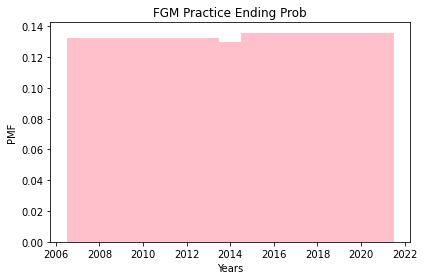

In [53]:
pmf.bar(width=7, color='pink')
decorate(xlabel='Years', 
         ylabel='PMF', 
         title='FGM Practice Ending Prob')

# New Section

In [44]:
surv = cdf.make_surv()
surv

,probs
Year,
2010,0.867284
2012,0.739198
2013,0.637346
2014,0.520062
2015,0.395062
2016,0.265432
2017,0.135802
2018,0.000000


In [30]:
surv(2018)

array(0.)

In [31]:
cdf(2018) + surv(2018)

1.0

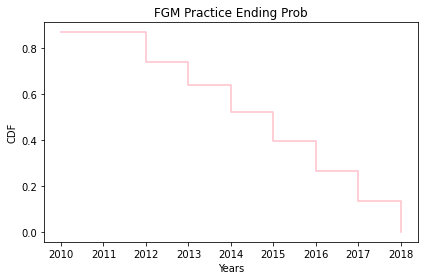

In [52]:
surv.step(color='pink')
decorate(xlabel='Years', 
         ylabel='CDF', 
         title='FGM Practice Ending Prob')
